In [1]:
# Import necessary packages for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set file name to load, containing the data to be analyzed
file_name = r"C:\Users\michael.wong\Desktop\GADataScience\Final Project\usa_00010.dat"

# The data set used in this analysis was limited to 2015, due to the large file size across multiple years. 
# It is assumed the range of values is similar across years of the surveys.

In [2]:
# The file is downloaded in fixed width format
# The specifications provide the start and end position for each variable and the variable name
colspecs = [(0,4),(4,6),(6,14),(14,16),(16,26),(26,28),
            (28,33),(33,34),(34,38),(38,45),(45,52),(52,54),
            (54,58),(58,68),(68,69),(69,72),(72,74),(74,77),(77,78),
            (78,80),(80,84),(84,87)]
names = ['YEAR','DATANUM','SERIAL','NUMPREC','HHWT','STATEFIP',
         'PUMA','GQ','RENT','HHINCOME','VALUEH','UNITSSTR',
         'PERNUM','PERWT','RACE','RACED','EDUC','EDUCD','EMPSTAT',
         'EMPSTATD','OCC2010','IND1990']

# Some extra variables, in addition to those intended for analysis have been included in case they may be useful later

In [3]:
data = pd.read_fwf(file_name, header=None, colspecs=colspecs, names=names)

In [4]:
# Select columns of interest for analysis
data_primary=data[['VALUEH','RENT','HHINCOME','UNITSSTR','EDUC','RACE','EMPSTAT','PUMA','YEAR']]

In [100]:
# take brooklyn data only, for speed/scope
brooklyn = data_primary[data_primary['PUMA'].isin([4001,4004,4003,4002,4008,4005,4012,4006,4011,4013,4017,4014,4018,4015,
                                                   4016,4007,4010,4009])]

In [101]:
brooklyn.describe()

,VALUEH,RENT,HHINCOME,UNITSSTR,EDUC,RACE,EMPSTAT,PUMA,YEAR
count,1.449980e+05,144998.000000,1.449980e+05,144998.000000,144998.000000,144998.000000,144998.00000,144998.000000,144998.000000
mean,6.425934e+06,681.880950,3.630375e+05,6.218189,5.831618,2.322487,1.47242,4009.914813,2012.569773
std,4.547005e+06,753.114388,1.641964e+06,2.483283,3.486330,1.977826,1.12845,5.122975,1.690081
min,0.000000e+00,0.000000,-2.010000e+04,0.000000,0.000000,1.000000,0.00000,4001.000000,2010.000000
25%,7.000000e+05,0.000000,2.780000e+04,5.000000,2.000000,1.000000,1.00000,4006.000000,2011.000000
50%,9.999999e+06,540.000000,6.000000e+04,6.000000,6.000000,2.000000,1.00000,4010.000000,2013.000000
75%,9.999999e+06,1200.000000,1.150000e+05,9.000000,10.000000,2.000000,3.00000,4014.000000,2014.000000
max,9.999999e+06,3800.000000,9.999999e+06,10.000000,11.000000,9.000000,3.00000,4018.000000,2015.000000


In [102]:
pd.set_option('display.max_columns', None)

In [103]:
brooklyn.UNITSSTR.value_counts()

5     28018
6     23282
10    21927
4     19120
9     15217
7     13210
3     12498
8      7353
0      4077
1       240
2        56
Name: UNITSSTR, dtype: int64

In [246]:
brooklyn_2f = brooklyn[brooklyn['UNITSSTR'].isin([5])]

In [247]:
brooklyn_34f = brooklyn[brooklyn['UNITSSTR'].isin([6])]

In [248]:
brooklyn_234f = brooklyn[brooklyn['UNITSSTR'].isin([5,6])]

In [249]:
# replace default values that skew data
brooklyn_2f.VALUEH = brooklyn.VALUEH.replace({9999999.0: np.nan})
brooklyn_2f.HHINCOME = brooklyn.HHINCOME.replace({9999999.0: np.nan})
brooklyn_34f.VALUEH = brooklyn.VALUEH.replace({9999999.0: np.nan})
brooklyn_34f.HHINCOME = brooklyn.HHINCOME.replace({9999999.0: np.nan})

In [250]:
brooklyn_234f.VALUEH = brooklyn.VALUEH.replace({9999999.0: np.nan})
brooklyn_234f.HHINCOME = brooklyn.HHINCOME.replace({9999999.0: np.nan})

In [251]:
brooklyn_2f = brooklyn_2f.dropna(axis=0)
brooklyn_34f = brooklyn_34f.dropna(axis=0)

In [252]:
brooklyn_234f = brooklyn_234f.dropna(axis=0)

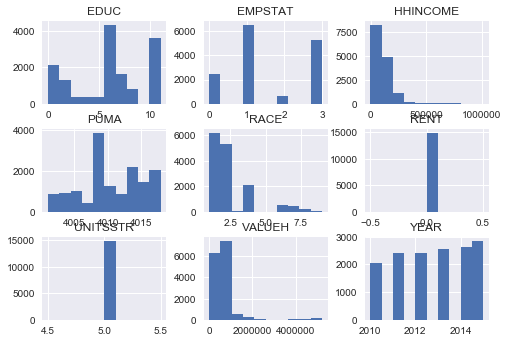

In [216]:
# Apply the hist and show functions to plot and show histograms of the 4 columns of data
brooklyn_2f.hist();
plt.show();

In [218]:
brooklyn_2f.describe()

,VALUEH,RENT,HHINCOME,UNITSSTR,EDUC,RACE,EMPSTAT,PUMA,YEAR
count,1.492000e+04,14920.0,1.492000e+04,14920.0,14920.000000,14920.000000,14920.000000,14920.000000,14920.000000
mean,6.889158e+05,0.0,1.110873e+05,5.0,6.013539,2.274598,1.587668,4010.562668,2012.661863
std,5.837998e+05,0.0,1.032807e+05,0.0,3.328268,1.702602,1.131164,4.591478,1.693941
min,0.000000e+00,0.0,-3.500000e+03,5.0,0.000000,1.000000,0.000000,4001.000000,2010.000000
25%,4.500000e+05,0.0,4.867750e+04,5.0,3.000000,1.000000,1.000000,4008.000000,2011.000000
50%,6.000000e+05,0.0,8.757500e+04,5.0,6.000000,2.000000,1.000000,4010.000000,2013.000000
75%,8.000000e+05,0.0,1.420000e+05,5.0,8.000000,2.000000,3.000000,4014.000000,2014.000000
max,5.216000e+06,0.0,1.012100e+06,5.0,11.000000,9.000000,3.000000,4018.000000,2015.000000


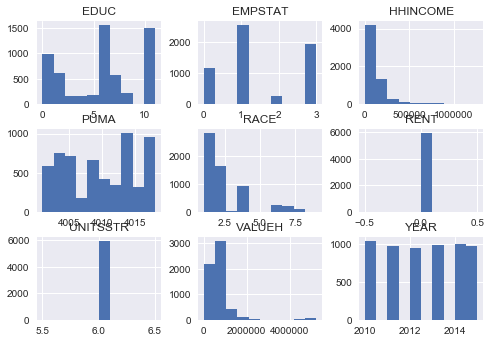

,VALUEH,RENT,HHINCOME,UNITSSTR,EDUC,RACE,EMPSTAT,PUMA,YEAR
count,5.952000e+03,5952.0,5.952000e+03,5952.0,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000
mean,7.522797e+05,0.0,1.131495e+05,6.0,5.804603,2.293851,1.499160,4009.706821,2012.480007
std,6.502042e+05,0.0,1.117060e+05,0.0,3.506667,1.796066,1.141331,5.344641,1.719618
min,3.000000e+02,0.0,0.000000e+00,6.0,0.000000,1.000000,0.000000,4001.000000,2010.000000
25%,4.500000e+05,0.0,4.560000e+04,6.0,2.000000,1.000000,1.000000,4005.000000,2011.000000
50%,6.500000e+05,0.0,8.723000e+04,6.0,6.000000,2.000000,1.000000,4010.000000,2012.000000
75%,9.000000e+05,0.0,1.390750e+05,6.0,10.000000,4.000000,3.000000,4014.000000,2014.000000
max,5.216000e+06,0.0,1.265000e+06,6.0,11.000000,9.000000,3.000000,4018.000000,2015.000000


In [219]:
brooklyn_34f.hist();
plt.show();
brooklyn_34f.describe()

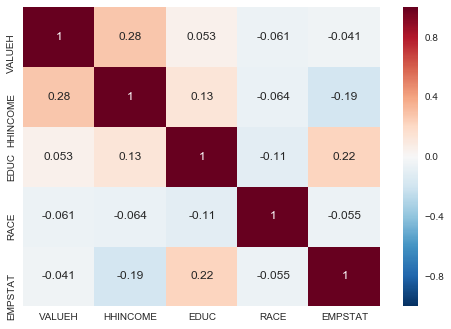

In [224]:
x = brooklyn_234f[['VALUEH','HHINCOME','EDUC','RACE','EMPSTAT']]
sns.heatmap(x.corr(), annot=True);
plt.show();

In [253]:
bk_dummies = pd.get_dummies(brooklyn_2f.EDUC,prefix='EDUC',drop_first=True)
brooklyn_2f = pd.concat([brooklyn_2f,bk_dummies],axis=1)

In [254]:
bk_dummies = pd.get_dummies(brooklyn_34f.EDUC,prefix='EDUC',drop_first=True)
brooklyn_34f = pd.concat([brooklyn_34f,bk_dummies],axis=1)

In [255]:
bk_dummies = pd.get_dummies(brooklyn_2f.RACE,prefix='RACE',drop_first=True)
brooklyn_2f = pd.concat([brooklyn_2f,bk_dummies],axis=1)

In [256]:
bk_dummies = pd.get_dummies(brooklyn_34f.RACE,prefix='RACE',drop_first=True)
brooklyn_34f = pd.concat([brooklyn_34f,bk_dummies],axis=1)

In [257]:
bk_dummies = pd.get_dummies(brooklyn_2f.EMPSTAT,prefix='EMPSTAT',drop_first=True)
brooklyn_2f = pd.concat([brooklyn_2f,bk_dummies],axis=1)

In [258]:
bk_dummies = pd.get_dummies(brooklyn_34f.EMPSTAT,prefix='EMPSTAT',drop_first=True)
brooklyn_34f = pd.concat([brooklyn_34f,bk_dummies],axis=1)

In [259]:
RACE = {
    1:"1: White",
    2:"2: Black/African American/Negro",
    3:"3: American Indian or Alaska Native",
    4:"4: Chinese",
    5:"5: Japanese",
    6:"6: Other Asian or Pacific Islander",
    7:"7: Other race, nec",
    8:"8: Two major races",
    9:"9: Three or more major races"}
EDUC={
    0:"0: N/A or no schooling",
    1:"1: Nursery school to grade 4",
    2:"2: Grade 5, 6, 7, or 8",
    3:"3: Grade 9",
    4:"4: Grade 10",
    5:"5: Grade 11",
    6:"6: Grade 12",
    7:"7: 1 year of college",
    8:"8: 2 years of college",
    9:"9: 3 years of college",
    10:"10: 4 years of college",
    11:"11: 5+ years of college"}
EMPSTAT ={
    0:"0-N/A",
    1:"1: Employed",
    2:"2: Unemployed",
    3:"3: Not in labor force"}
UNITSSTR ={
    0:"0: N/A",
    1:"1: Mobile home or trailer",
    2:"2: Boat, tent, van, other",
    3:"3: 1-family house, detached",
    4:"4: 1-family house, attached",
    5:"5: 2-family building",
    6:"6: 3-4 family building",
    7:"7: 5-9 family building",
    8:"8: 10-19 family building",
    9:"9: 20-49 family building",
    10:"10: 50+ family building"}

In [260]:
# Map index keys and store mapped values
brooklyn_2f=brooklyn_2f.replace({'RACE': RACE,'EDUC': EDUC,'EMPSTAT': EMPSTAT})
brooklyn_34f=brooklyn_34f.replace({'RACE': RACE,'EDUC': EDUC,'EMPSTAT': EMPSTAT})

In [261]:
brooklyn_234f=brooklyn_234f.replace({'RACE': RACE,'EDUC': EDUC,'EMPSTAT': EMPSTAT,'UNITSSTR':UNITSSTR})

In [262]:
brooklyn_2f.head()

,VALUEH,RENT,HHINCOME,UNITSSTR,EDUC,RACE,EMPSTAT,PUMA,YEAR,EDUC_1,EDUC_2,EDUC_3,EDUC_4,EDUC_5,EDUC_6,EDUC_7,EDUC_8,EDUC_10,EDUC_11,RACE_2,RACE_3,RACE_4,RACE_5,RACE_6,RACE_7,RACE_8,RACE_9,EMPSTAT_1,EMPSTAT_2,EMPSTAT_3
66064,700000.0,0,83800.0,5,6: Grade 12,4: Chinese,1: Employed,4016,2010,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
66065,700000.0,0,83800.0,5,11: 5+ years of college,4: Chinese,1: Employed,4016,2010,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
66066,700000.0,0,83800.0,5,7: 1 year of college,4: Chinese,1: Employed,4016,2010,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
66067,700000.0,0,83800.0,5,6: Grade 12,4: Chinese,3: Not in labor force,4016,2010,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
66068,700000.0,0,83800.0,5,1: Nursery school to grade 4,4: Chinese,3: Not in labor force,4016,2010,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [263]:
brooklyn_2f[['VALUEH']]=np.divide(brooklyn_2f[['VALUEH']], 1000000)
brooklyn_34f[['VALUEH']]=np.divide(brooklyn_34f[['VALUEH']], 1000000)

In [264]:
brooklyn_234f[['VALUEH']]=np.divide(brooklyn_234f[['VALUEH']], 1000000)

In [265]:
brooklyn_2f[['HHINCOME']]=np.divide(brooklyn_2f[['HHINCOME']], 1000000)
brooklyn_34f[['HHINCOME']]=np.divide(brooklyn_34f[['HHINCOME']], 1000000)

In [266]:
brooklyn_234f[['HHINCOME']]=np.divide(brooklyn_234f[['HHINCOME']], 1000000)

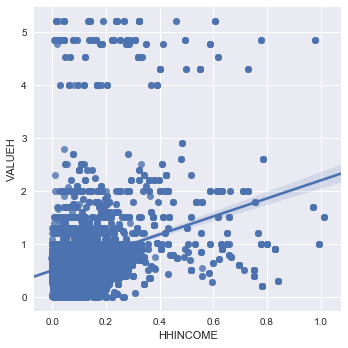

In [267]:
sns.lmplot('HHINCOME','VALUEH', brooklyn_2f);
plt.show();

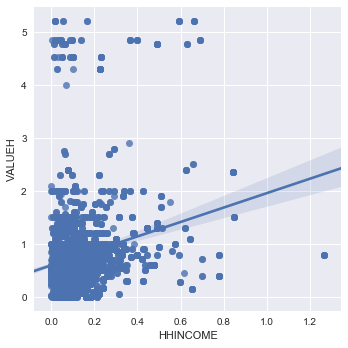

In [268]:
sns.lmplot('HHINCOME','VALUEH', brooklyn_34f);
plt.show();

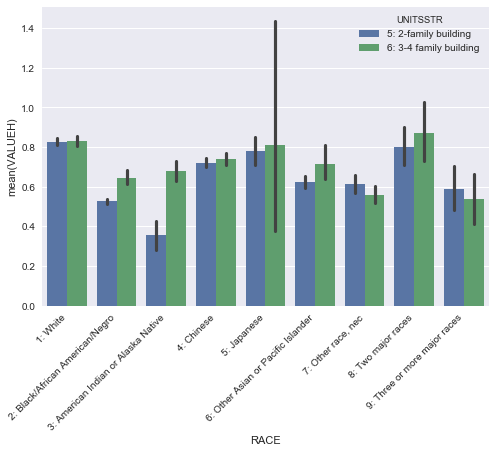

In [273]:
plot = sns.barplot(x="RACE", y="VALUEH", data=brooklyn_234f,hue='UNITSSTR',order=["1: White",
    "2: Black/African American/Negro",
    "3: American Indian or Alaska Native",
    "4: Chinese",
    "5: Japanese",
    "6: Other Asian or Pacific Islander",
    "7: Other race, nec",
    "8: Two major races",
    "9: Three or more major races"]);
plot.set_xticklabels(plot.get_xticklabels(), rotation=45,horizontalalignment='right');
plt.show()

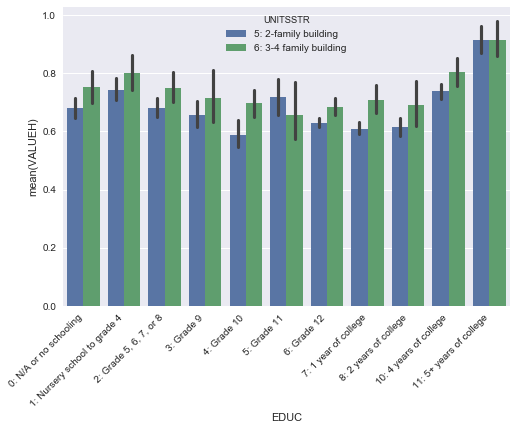

In [274]:
plot = sns.barplot(x="EDUC", y="VALUEH", data=brooklyn_234f,hue='UNITSSTR',order=["0: N/A or no schooling",
    "1: Nursery school to grade 4",
    "2: Grade 5, 6, 7, or 8",
    "3: Grade 9",
    "4: Grade 10",
    "5: Grade 11",
    "6: Grade 12",
    "7: 1 year of college",
    "8: 2 years of college",
    
    "10: 4 years of college",
    "11: 5+ years of college"]);
plot.set_xticklabels(plot.get_xticklabels(), rotation=45,horizontalalignment='right');
plt.show()

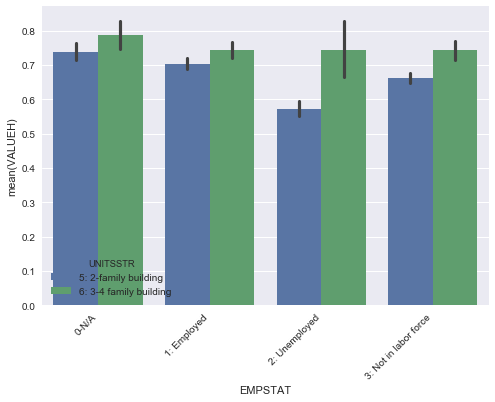

In [275]:
plot = sns.barplot(x="EMPSTAT", y="VALUEH", data=brooklyn_234f,hue='UNITSSTR',order=["0-N/A",
    "1: Employed",
    "2: Unemployed",
    "3: Not in labor force"]);
plot.set_xticklabels(plot.get_xticklabels(), rotation=45,horizontalalignment='right');
plt.show()

In [276]:
brooklyn_34f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5952 entries, 66145 to 2170076
Data columns (total 30 columns):
VALUEH       5952 non-null float64
RENT         5952 non-null int64
HHINCOME     5952 non-null float64
UNITSSTR     5952 non-null int64
EDUC         5952 non-null object
RACE         5952 non-null object
EMPSTAT      5952 non-null object
PUMA         5952 non-null int64
YEAR         5952 non-null int64
EDUC_1       5952 non-null uint8
EDUC_2       5952 non-null uint8
EDUC_3       5952 non-null uint8
EDUC_4       5952 non-null uint8
EDUC_5       5952 non-null uint8
EDUC_6       5952 non-null uint8
EDUC_7       5952 non-null uint8
EDUC_8       5952 non-null uint8
EDUC_10      5952 non-null uint8
EDUC_11      5952 non-null uint8
RACE_2       5952 non-null uint8
RACE_3       5952 non-null uint8
RACE_4       5952 non-null uint8
RACE_5       5952 non-null uint8
RACE_6       5952 non-null uint8
RACE_7       5952 non-null uint8
RACE_8       5952 non-null uint8
RACE_9       5952 non

In [280]:
import statsmodels.formula.api as smf
lm_stats = smf.ols(formula='VALUEH ~ HHINCOME +EDUC_5+EDUC_6+EDUC_10+EDUC_11+RACE_2+RACE_3+RACE_4+RACE_6+RACE_7+RACE_9+EMPSTAT_1+EMPSTAT_2+EMPSTAT_3', data=brooklyn_2f).fit()
lm_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 VALUEH   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     168.1
Date:                Mon, 02 Oct 2017   Prob (F-statistic):               0.00
Time:                        00:00:01   Log-Likelihood:                -12046.
No. Observations:               14920   AIC:                         2.412e+04
Df Residuals:                   14905   BIC:                         2.424e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6494      0.014     47.731      0.000       0.623       0.676
HHINCOME       1.5058      0.045     33.228      0.000       1.417       1.595
EDUC_5         0.0852      0.029      2.960      0.003       0.029       0.142
EDUC_6         0.0118      0.012      0.999      0.318      -0.011       0.035
EDUC_10        0.0402      0.015      2.689      0.007       0.011       0.069
EDUC_11        0.1595      0.017      9.340      0.000       0.126       0.193
RACE_2        -0.2438      0.010    -23.772      0.000      -0.264      -0.224
RACE_3        -0.4617      0.096     -4.796      0.000      -0.650      -0.273
RACE_4        -0.0451      0.014     -3.271      0.001      -0.072      -0.018
RACE_6        -0.1454      0.024     -5.946      0.000      -0.193      -0.097
RACE_7        -0.1405      0.027     -5.268      0.000      -0.193      -0.088
RACE_9        -0.2161      0.086     -2.509      0.012      -0.385      -0.047
EMPSTAT_1     -0.0724      0.015     -4.829      0.000      -0.102      -0.043
EMPSTAT_2     -0.0959      0.025     -3.878      0.000      -0.144      -0.047
EMPSTAT_3     -0.0413      0.015     -2.772      0.006      -0.070      -0.012
==============================================================================
Omnibus:                    14388.541   Durbin-Watson:                   0.660
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           694206.947
Skew:                           4.748   Prob(JB):                         0.00
Kurtosis:                      35.039   Cond. No.                         27.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [281]:
brooklyn_34f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5952 entries, 66145 to 2170076
Data columns (total 30 columns):
VALUEH       5952 non-null float64
RENT         5952 non-null int64
HHINCOME     5952 non-null float64
UNITSSTR     5952 non-null int64
EDUC         5952 non-null object
RACE         5952 non-null object
EMPSTAT      5952 non-null object
PUMA         5952 non-null int64
YEAR         5952 non-null int64
EDUC_1       5952 non-null uint8
EDUC_2       5952 non-null uint8
EDUC_3       5952 non-null uint8
EDUC_4       5952 non-null uint8
EDUC_5       5952 non-null uint8
EDUC_6       5952 non-null uint8
EDUC_7       5952 non-null uint8
EDUC_8       5952 non-null uint8
EDUC_10      5952 non-null uint8
EDUC_11      5952 non-null uint8
RACE_2       5952 non-null uint8
RACE_3       5952 non-null uint8
RACE_4       5952 non-null uint8
RACE_5       5952 non-null uint8
RACE_6       5952 non-null uint8
RACE_7       5952 non-null uint8
RACE_8       5952 non-null uint8
RACE_9       5952 non

In [285]:
import statsmodels.formula.api as smf
lm_stats = smf.ols(formula='VALUEH ~ HHINCOME+EDUC_11+RACE_2+RACE_6+RACE_7+EMPSTAT_1', data=brooklyn_34f).fit()
lm_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 VALUEH   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     76.67
Date:                Mon, 02 Oct 2017   Prob (F-statistic):           1.39e-92
Time:                        00:05:11   Log-Likelihood:                -5661.1
No. Observations:                5952   AIC:                         1.134e+04
Df Residuals:                    5945   BIC:                         1.138e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6716      0.014     46.588      0.000       0.643       0.700
HHINCOME       1.3167      0.074     17.679      0.000       1.171       1.463
EDUC_11        0.1247      0.027      4.640      0.000       0.072       0.177
RACE_2        -0.1409      0.019     -7.588      0.000      -0.177      -0.104
RACE_6        -0.0912      0.041     -2.209      0.027      -0.172      -0.010
RACE_7        -0.1917      0.045     -4.218      0.000      -0.281      -0.103
EMPSTAT_1     -0.0776      0.017     -4.555      0.000      -0.111      -0.044
==============================================================================
Omnibus:                     5128.730   Durbin-Watson:                   0.638
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           149335.448
Skew:                           4.119   Prob(JB):                         0.00
Kurtosis:                      26.115   Cond. No.                         10.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [286]:
from sklearn import cross_validation

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [287]:
from sklearn import linear_model, metrics

In [289]:
modeldata = brooklyn_2f[['EDUC_1','EDUC_2','EDUC_3','EDUC_4','EDUC_5','EDUC_6','EDUC_7','EDUC_8','EDUC_10','EDUC_11','RACE_2','RACE_3','RACE_4','RACE_5','RACE_6','RACE_7','RACE_8','RACE_9','EMPSTAT_1','EMPSTAT_2','EMPSTAT_3']]
y = brooklyn_2f.VALUEH

scores = []
kf = cross_validation.KFold(len(modeldata), n_folds=10, shuffle=True)
for train_index, test_index in kf:
    lm = linear_model.LinearRegression().fit(
        modeldata.iloc[train_index], y.iloc[train_index])
    scores.append(metrics.mean_squared_error(
        y.iloc[test_index], lm.predict(modeldata.iloc[test_index])))

print(scores)
np.mean(scores)

[0.37080244972867699, 0.41936417887908622, 0.26337382760079814, 0.26543617164710237, 0.23793905341354923, 0.30848046569788856, 0.34186115481702978, 0.25531977578787557, 0.32149804024407069, 0.38347846947866809]


0.31675535872947458

In [293]:
modeldata = brooklyn_2f[['HHINCOME','EDUC_5','EDUC_6','EDUC_10','EDUC_11','RACE_2','RACE_3','RACE_4','RACE_6','RACE_7','RACE_9','EMPSTAT_1','EMPSTAT_2','EMPSTAT_3']]
y = brooklyn_2f.VALUEH

scores = []
kf = cross_validation.KFold(len(modeldata), n_folds=10, shuffle=True)
for train_index, test_index in kf:
    lm = linear_model.LinearRegression().fit(
        modeldata.iloc[train_index], y.iloc[train_index])
    scores.append(metrics.mean_squared_error(
        y.iloc[test_index], lm.predict(modeldata.iloc[test_index])))

print(scores)
np.mean(scores)

[0.30505049342378265, 0.35199216907309189, 0.31260989841707493, 0.28025680319780444, 0.2632819344020122, 0.27958474047233278, 0.28689039302018371, 0.32330262231082441, 0.24903694167588294, 0.29649771992141649]


0.29485037159144067

In [290]:
modeldata = brooklyn_34f[['EDUC_1','EDUC_2','EDUC_3','EDUC_4','EDUC_5','EDUC_6','EDUC_7','EDUC_8','EDUC_10','EDUC_11','RACE_2','RACE_3','RACE_4','RACE_5','RACE_6','RACE_7','RACE_8','RACE_9','EMPSTAT_1','EMPSTAT_2','EMPSTAT_3']]
y = brooklyn_34f.VALUEH

scores = []
kf = cross_validation.KFold(len(modeldata), n_folds=10, shuffle=True)
for train_index, test_index in kf:
    lm = linear_model.LinearRegression().fit(
        modeldata.iloc[train_index], y.iloc[train_index])
    scores.append(metrics.mean_squared_error(
        y.iloc[test_index], lm.predict(modeldata.iloc[test_index])))

print(scores)
np.mean(scores)

[0.40041090743432539, 0.57834609091800138, 0.33254550163418217, 0.482951665135951, 0.40580127816024425, 0.49056876723689713, 0.37502749182607109, 0.36964580344682263, 0.301967645038489, 0.39085670818802037]


0.41281218590190044

In [294]:

modeldata = brooklyn_34f[['HHINCOME','EDUC_11','RACE_2','RACE_6','RACE_7','EMPSTAT_1']]
y = brooklyn_34f.VALUEH

scores = []
kf = cross_validation.KFold(len(modeldata), n_folds=10, shuffle=True)
for train_index, test_index in kf:
    lm = linear_model.LinearRegression().fit(
        modeldata.iloc[train_index], y.iloc[train_index])
    scores.append(metrics.mean_squared_error(
        y.iloc[test_index], lm.predict(modeldata.iloc[test_index])))

print(scores)
np.mean(scores)

[0.27959224254357257, 0.43631696291017358, 0.40166073681912795, 0.3468643489693698, 0.36227285923915759, 0.38692111297165072, 0.49904627231632132, 0.4917821238282577, 0.41132253389643669, 0.31766617104339423]


0.39334453645374617

Mean of MSE for 3 folds: 0.394378038176
Mean of MSE for 5 folds: 0.393583432428
Mean of MSE for 7 folds: 0.393990613218
Mean of MSE for 9 folds: 0.393827156807
Mean of MSE for 11 folds: 0.393368210716
Mean of MSE for 13 folds: 0.393085661374
Mean of MSE for 15 folds: 0.393456508354
Mean of MSE for 17 folds: 0.393563779623
Mean of MSE for 19 folds: 0.393718007569
Mean of MSE for 21 folds: 0.393680227655
Mean of MSE for 23 folds: 0.393302117005
Mean of MSE for 25 folds: 0.393570167162
Mean of MSE for 27 folds: 0.393358699658
Mean of MSE for 29 folds: 0.39354151412
Mean of MSE for 31 folds: 0.393505905317
Mean of MSE for 33 folds: 0.393766327809
Mean of MSE for 35 folds: 0.394097174301
Mean of MSE for 37 folds: 0.393517458833
Mean of MSE for 39 folds: 0.393415409515
Mean of MSE for 41 folds: 0.393464597459
Mean of MSE for 43 folds: 0.393833849477
Mean of MSE for 45 folds: 0.393617823401
Mean of MSE for 47 folds: 0.393836364388
Mean of MSE for 49 folds: 0.393790252391
Mean of MSE for 51 fo

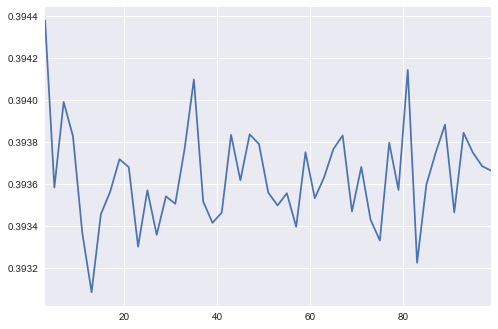

In [296]:
modeldata = brooklyn_34f[['HHINCOME','EDUC_11','RACE_2','RACE_6','RACE_7','EMPSTAT_1']]
y = brooklyn_34f.VALUEH
#modeldata = brooklyn_2f[['HHINCOME','EDUC_5','EDUC_6','EDUC_10','EDUC_11','RACE_2','RACE_3','RACE_4','RACE_6','RACE_7','RACE_9','EMPSTAT_1','EMPSTAT_2','EMPSTAT_3']]
#y = brooklyn_2f.VALUEH

mse_avg = {}
for n_folds in range(3, 100, 2):
    mse_values = []
    scores = []
    n= 0

    scores = []
    kf = cross_validation.KFold(len(modeldata), n_folds=n_folds, shuffle=True)
    for train_index, test_index in kf:
        lm = linear_model.LinearRegression().fit(
            modeldata.iloc[train_index], y.iloc[train_index])
        mse_values.append(metrics.mean_squared_error(
            y.iloc[test_index], lm.predict(modeldata.iloc[test_index])))
        scores.append(lm.score(modeldata, y))
        n+=1

        mse_avg[n_folds] = np.mean(mse_values)
    print 'Mean of MSE for {} folds:'.format(n_folds), np.mean(mse_values)
pd.Series(mse_avg).plot();
plt.show()

In [26]:
lm = linear_model.LinearRegression().fit(modeldata, y)
print "~~~~ Single Model ~~~~"
print 'MSE of single model:', metrics.mean_squared_error(y, lm.predict(modeldata))
print 'R2: ', lm.score(modeldata, y)

~~~~ Single Model ~~~~
MSE of single model: 0.385178141778
R2:  0.22550109383


In [27]:
lm = linear_model.LinearRegression().fit(modeldata, y)
print "~~~ OLS ~~~"
print 'OLS MSE: ', metrics.mean_squared_error(y, lm.predict(modeldata))
print 'OLS R2:', lm.score(modeldata, y)

lm = linear_model.Lasso().fit(modeldata, y)
print "~~~ Lasso ~~~"
print 'Lasso MSE: ', metrics.mean_squared_error(y, lm.predict(modeldata))
print 'Lasso R2:', lm.score(modeldata, y)

lm = linear_model.Ridge().fit(modeldata, y)
print "~~~ Ridge ~~~"
print 'Ridge MSE: ', metrics.mean_squared_error(y, lm.predict(modeldata))
print 'Ridge R2:', lm.score(modeldata, y)

~~~ OLS ~~~
OLS MSE:  0.385178141778
OLS R2: 0.22550109383
~~~ Lasso ~~~
Lasso MSE:  0.497325611063
Lasso R2: 0.0
~~~ Ridge ~~~
Ridge MSE:  0.385182870341
Ridge R2: 0.225491585848


In [301]:
#modeldata = brooklyn_34f[['HHINCOME','EDUC_11','RACE_2','RACE_6','RACE_7','EMPSTAT_1']]
#y = brooklyn_34f.VALUEH
modeldata = brooklyn_2f[['HHINCOME','EDUC_5','EDUC_6','EDUC_10','EDUC_11','RACE_2','RACE_3','RACE_4','RACE_6','RACE_7','RACE_9','EMPSTAT_1','EMPSTAT_2','EMPSTAT_3']]
y = brooklyn_2f.VALUEH

from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-10, 10, 21)
gs = GridSearchCV(
    cv=5,
    estimator=linear_model.Ridge(),
    param_grid={'alpha': alphas, 'fit_intercept': [True, False]},
    scoring='mean_squared_error')

gs.fit(modeldata, y)

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-pa

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-pa

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-pa

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-pa

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-pa

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-pa

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-pa

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-pa

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-pa

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda2\lib\site-pa

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-10,   1.00000e-09,   1.00000e-08,   1.00000e-07,
         1.00000e-06,   1.00000e-05,   1.00000e-04,   1.00000e-03,
         1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04,   1.00000e+05,
         1.00000e+06,   1.00000e+07,   1.00000e+08,   1.00000e+09,
         1.00000e+10]), 'fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='mean_squared_error', verbose=0)

In [302]:
print -gs.best_score_ 

0.297124381829


In [303]:
print gs.best_estimator_ 

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


In [304]:
from pprint import pprint
pprint(gs.grid_scores_)

[mean: -0.29713, std: 0.14242, params: {'alpha': 1e-10, 'fit_intercept': True},
 mean: -0.34198, std: 0.14650, params: {'alpha': 1e-10, 'fit_intercept': False},
 mean: -0.29713, std: 0.14242, params: {'alpha': 1.0000000000000001e-09, 'fit_intercept': True},
 mean: -0.34198, std: 0.14650, params: {'alpha': 1.0000000000000001e-09, 'fit_intercept': False},
 mean: -0.29713, std: 0.14242, params: {'alpha': 1e-08, 'fit_intercept': True},
 mean: -0.34198, std: 0.14650, params: {'alpha': 1e-08, 'fit_intercept': False},
 mean: -0.29713, std: 0.14242, params: {'alpha': 9.9999999999999995e-08, 'fit_intercept': True},
 mean: -0.34198, std: 0.14650, params: {'alpha': 9.9999999999999995e-08, 'fit_intercept': False},
 mean: -0.29713, std: 0.14242, params: {'alpha': 9.9999999999999995e-07, 'fit_intercept': True},
 mean: -0.34198, std: 0.14650, params: {'alpha': 9.9999999999999995e-07, 'fit_intercept': False},
 mean: -0.29713, std: 0.14242, params: {'alpha': 1.0000000000000001e-05, 'fit_intercept': Tru

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [305]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz # to visualize decision tree using graphviz http://www.graphviz.org/
from sklearn.externals.six import StringIO
import pydot # python interface to graphviz dot language https://github.com/erocarrera/pydot
from os import system
from IPython.display import Image # to display graphviz image in notebook

In [310]:

RACE = {
    "1: White":1,
    "2: Black/African American/Negro":3,
    "3: American Indian or Alaska Native":2,
    "4: Chinese":4,
    "5: Japanese":5,
    "6: Other Asian or Pacific Islander":6,
    "7: Other race, nec":7,
    "8: Two major races":8,
    "9: Three or more major races":9}
EDUC={
    "0: N/A or no schooling":0,
    "1: Nursery school to grade 4":1,
    "2: Grade 5, 6, 7, or 8":2,
    "3: Grade 9":3,
    "4: Grade 10":4,
    "5: Grade 11":5,
    "6: Grade 12":6,
    "7: 1 year of college":7,
    "8: 2 years of college":8,
    "9: 3 years of college":9,
    "10: 4 years of college":10,
    "11: 5+ years of college":11}
EMPSTAT ={
    "0-N/A":0,
    "1: Employed":1,
    "2: Unemployed":2,
    "3: Not in labor force":3}

brooklyn_2f=brooklyn_2f.replace({'RACE': RACE,'EDUC': EDUC,'EMPSTAT': EMPSTAT})
brooklyn_34f=brooklyn_34f.replace({'RACE': RACE,'EDUC': EDUC,'EMPSTAT': EMPSTAT})

In [332]:
brooklyn_34f['VALUEH']=brooklyn_34f[['VALUEH']].astype(int)

In [333]:
brooklyn_34f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5952 entries, 66145 to 2170076
Data columns (total 30 columns):
VALUEH       5952 non-null int32
RENT         5952 non-null int64
HHINCOME     5952 non-null int32
UNITSSTR     5952 non-null int64
EDUC         5952 non-null int64
RACE         5952 non-null int64
EMPSTAT      5952 non-null int64
PUMA         5952 non-null int64
YEAR         5952 non-null int64
EDUC_1       5952 non-null uint8
EDUC_2       5952 non-null uint8
EDUC_3       5952 non-null uint8
EDUC_4       5952 non-null uint8
EDUC_5       5952 non-null uint8
EDUC_6       5952 non-null uint8
EDUC_7       5952 non-null uint8
EDUC_8       5952 non-null uint8
EDUC_10      5952 non-null uint8
EDUC_11      5952 non-null uint8
RACE_2       5952 non-null uint8
RACE_3       5952 non-null uint8
RACE_4       5952 non-null uint8
RACE_5       5952 non-null uint8
RACE_6       5952 non-null uint8
RACE_7       5952 non-null uint8
RACE_8       5952 non-null uint8
RACE_9       5952 non-null u

In [334]:
brooklyn['intercept']=1.0

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [336]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# Need this set up (from above)
model = DecisionTreeClassifier(max_depth=10)

X = brooklyn_2f[['HHINCOME','EDUC','RACE','EMPSTAT']] #'intercept'
y = brooklyn_2f['VALUEH'] # creating evergreen label from X to account for dropped rows

for depth in range(2, 10):
    model = DecisionTreeClassifier(max_depth=depth)
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    print(depth, scores.mean())

(2, -0.38464706950126892)
(3, -0.38491525589080966)
(4, -0.38498243743605942)
(5, -0.38478123014735971)
(6, -0.3841784170194294)
(7, -0.38437951187418717)
(8, -0.38437951187418717)
(9, -0.38451360506895754)


In [339]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# Need this set up (from above)
model = DecisionTreeClassifier(max_depth=10)

X = brooklyn_34f[['HHINCOME','EDUC','RACE','EMPSTAT']] #'intercept'
y = brooklyn_34f['VALUEH'] # creating evergreen label from X to account for dropped rows

for depth in range(2, 10):
    model = DecisionTreeClassifier(max_depth=depth)
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    print(depth, scores.mean())

(2, -0.51995831715313456)
(3, -0.51995831715313456)
(4, -0.52012666732148471)
(5, -0.51928914354459965)
(6, -0.52062917704543721)
(7, -0.52029641987790409)
(8, -0.52046420416333539)
(9, -0.52197596417407477)


In [343]:

#X = brooklyn_2f[['HHINCOME','EDUC','RACE','EMPSTAT']] #'intercept'
#y = brooklyn_2f['VALUEH'] # creating evergreen label from X to account for dropped rows

X = brooklyn_34f[['HHINCOME','EDUC','RACE','EMPSTAT']] #'intercept'
y = brooklyn_34f['VALUEH'] # creating evergreen label from X to account for dropped rows

In [344]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 20)
model.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [345]:
features = X.columns
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head()

,Features,Importance Score
1,EDUC,0.434567
2,RACE,0.431991
3,EMPSTAT,0.130935
0,HHINCOME,0.002507


In [346]:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error')
print('MSE {}, mean MSE {}'.format(scores, scores.mean()))

MSE_scores = {}
for n_trees in range(1, 100, 10):
    model = RandomForestClassifier(n_estimators = n_trees)
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error')
    print('n trees: {}, MSE {}, mean MSE {}'.format(n_trees, scores, scores.mean()))
    MSE_scores[n_trees] = scores.mean()
pd.Series(MSE_scores, name='MSE Scores').plot();

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:552: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=3.
  % (min_labels, self.n_folds)), Warning)


MSE [-0.53071501 -0.53326613 -0.50454087], mean MSE -0.522840667293
n trees: 1, MSE [-0.53423968 -0.53326613 -0.49949546], mean MSE -0.522333755303
n trees: 11, MSE [-0.53172205 -0.53326613 -0.50302725], mean MSE -0.52267180954
n trees: 21, MSE [-0.53373615 -0.53377016 -0.50454087], mean MSE -0.524015727391
n trees: 31, MSE [-0.53222558 -0.53125    -0.50302725], mean MSE -0.522167608087
n trees: 41, MSE [-0.53021148 -0.53377016 -0.50454087], mean MSE -0.522840836488
n trees: 51, MSE [-0.53373615 -0.53125    -0.50403633], mean MSE -0.523007493338
n trees: 61, MSE [-0.53323263 -0.53175403 -0.50302725], mean MSE -0.522671301955
n trees: 71, MSE [-0.53021148 -0.53175403 -0.50454087], mean MSE -0.522168793477
n trees: 81, MSE [-0.53172205 -0.53175403 -0.50403633], mean MSE -0.52250413786
n trees: 91, MSE [-0.52920443 -0.53125    -0.50302725], mean MSE -0.521160558741


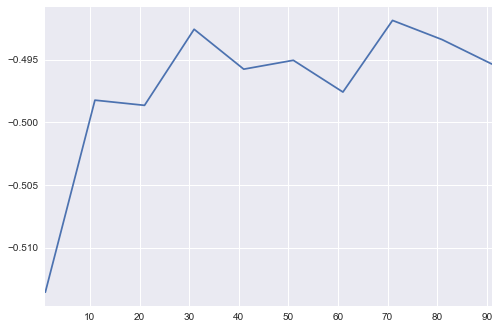

In [41]:
plt.show()